After completing a road race in athletics, the time (in minutes) spent to complete the route by the first seven classified was determined, having asked them about the average weekly number of hours dedicated to training. The following data was gathered

In [1]:
import pandas as pd

df = pd.read_csv('../../data_sets/athele_time_spent.csv')
df

,athele,training_number_hours_week,time_spent
0,A,30,27.8
1,B,27,28.3
2,C,26,29.1
3,D,24,29.7
4,E,22,31.0
5,F,20,31.5
6,G,17,32.7


# Problems
a) Determine, using the least squares method, the parameters of the linear regression line, interpreting their meaning within the context presented<br>
b) Analyze the goodness of fit by calculating the coefficient of determination<br>
c) Comment the following statment:<br>
#### "If an athlete trains about 33 hours a week, he has a chance to beat the race record, which is 26.4 minutes."

# Data Understanding

The unit of observation is the athlete. The sample has 7 observations. The atributes are:
* training_number_hours_week is the average weekly number of hours of training
* time_spent is the time spent in the road race (in minutes)

To answer the problem <b>a)</b> we must calculate the linear regression.<br>
Both variables are quantitaves, and on this case:<br>
* training_number_hours_week is the independent variable
* time_spent is the dependent variable

# Resolution

First lets obtain a dispersion diagram, namely the simple scatter since this a simple bivariate

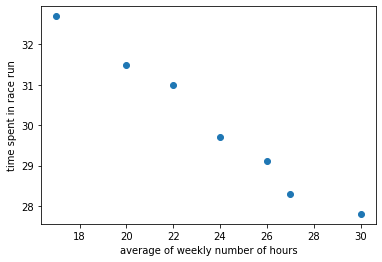

In [2]:
from matplotlib import pyplot as plt

# by convention x is the variable independent && y is the variable dependent 
x_values = df['training_number_hours_week']
y_values = df['time_spent']
plt.scatter(x = x_values, y = y_values)
plt.ylabel("time spent in race run")
plt.xlabel("average of weekly number of hours")
plt.show()

In [3]:
df[['training_number_hours_week','time_spent']].corr("pearson")

,training_number_hours_week,time_spent
training_number_hours_week,1.000000,-0.990038
time_spent,-0.990038,1.000000


In [4]:
#df.iloc[:,(len(df.columns)-2)].to_frame()
#df.iloc[:,(len(df.columns)-1)].to_frame()

As can be easily seen in the scatter diagram, there is a strong relationship between the average weekly number of hours of training and the shorter times spent in the test. The relationship is so strong that the observations are practically aligned. Also, when calculating the correlation of pearson we have a strong relation among training_number_hours_week and time_spent <b>(-0.990038)</b>

#### Linear regression model

In [5]:
from sklearn.linear_model import LinearRegression

#create object for the class
linear_regressor = LinearRegression()

x_shapped = x_values.values.reshape(-1, 1)
y_shapped = y_values.values.reshape(-1, 1)

linear_regressor.fit(x_shapped, y_shapped)

LinearRegression()

<i>Parameters of the linear regression</i>

In [24]:
coeficient_regression = float(linear_regressor.coef_)
print(coeficient_regression)

-0.4000000000000001


In [25]:
intercept = float(linear_regressor.intercept_)
print(intercept)

39.5


In [8]:
coeficient_determination = round(linear_regressor.score(x_shapped,y_shapped) * 100.0,2)
print(coeficient_determination)

98.02


<i>Calculated regression line</i>

<b>y = b * x + a </b><br>
where:<br>
b is the regression coeficient<br>
a is the intercept

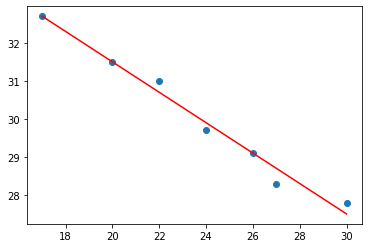

In [9]:
plt.scatter(x_shapped, y_shapped)

calculated_regression_line = coeficient_regression * x_shapped + intercept
#alternatively we can use this inseatead of writting all the equation
#linear_regressor.predict(x_shapped)

plt.plot(x_shapped, calculated_regression_line, color='red')


plt.show()

<i>If an athlete trains about 33 hours a week, he has a chance to beat the race record, which is <b>26.4</b> minutes?</i>

In [26]:
print(round(intercept - (-coeficient_regression) * 33,1))

26.3


Yes, because 26.3 is lower then 26.4